## ANALISIS DEL PROYECTO : TELECOMUNICACIONES MEGALINE

Paso 1: Preparacion de los datos 

1. Convierte los datos en tipos necesarios
2. Encuentra y elimina errores en los datos. 

In [223]:
#Cargamos las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from math import factorial
from datetime import datetime
from scipy import stats as st
import math

In [224]:
#cargamos lo archivos csv

mega_calls = pd.read_csv(r'C:\Users\hp\Desktop\career_da\python_projects\t.megaline\telecomunicaciones_megaline\megaline_calls (1).csv')
mega_internet = pd.read_csv(r'C:\Users\hp\Desktop\career_da\python_projects\t.megaline\telecomunicaciones_megaline\megaline_internet (1).csv')
mega_messages = pd.read_csv(r'C:\Users\hp\Desktop\career_da\python_projects\t.megaline\telecomunicaciones_megaline\megaline_messages (1).csv')
mega_plans = pd.read_csv(r'C:\Users\hp\Desktop\career_da\python_projects\t.megaline\telecomunicaciones_megaline\megaline_plans (1).csv')
mega_users = pd.read_csv(r'C:\Users\hp\Desktop\career_da\python_projects\t.megaline\telecomunicaciones_megaline\megaline_users (1).csv')

1. Conversion de los datos en tipos necesarios

Revisamos los tipos de datos de cada dataframe para analizar a detalle el tipo de dato de cada columna, para asi poder corregirla

In [225]:
mega_calls.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


Se puede ver 4 columnas de el ID, el USER_ID, la fecha y la duracion, pero al imprimir la informacion se aprecia que la fecha está en un formato object, lo cual no es correcto, por lo que se debe corregir y colocar el formato que le corresponde

In [226]:
#cambiamos el tipo de dato de la columna call_date
mega_calls['call_date'] = pd.to_datetime(mega_calls['call_date'], format = '%Y-%m-%d')

#redondeamos el tiempo al numero proximo mas cercano para un mejor analisis
mega_calls['duration'] = mega_calls['duration'].apply(math.ceil)

In [227]:
mega_messages.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


Se puede ver 3 columnas de el ID, el USER_ID y la fecha del mensaje , pero al imprimir la informacion se aprecia que la fecha está en un formato object, lo cual no es correcto, por lo que se debe corregir y colocar el formato que le corresponde

In [228]:
#cambiamos el tipo de dato de la columna message_date
mega_messages['message_date'] = pd.to_datetime(mega_messages['message_date'], format = '%Y-%m-%d')

In [229]:
mega_internet.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


Se puede ver 4 columnas de el ID, el USER_ID, la fecha y los mb, pero al imprimir la informacion se aprecia que la fecha está en un formato object, lo cual no es correcto, por lo que se debe corregir y colocar el formato que le corresponde y ademas que no la empresa utiliza gb y no mb, por lo que es mas conveniente. Asi que se le cambiaría el nombre de la columna y convertiría lo mb en gb. 

In [230]:
#cambiamos el nombre de la columna el nombre mas conveniente y al que vamos a usar, en este caso usaremos gb
mega_internet = mega_internet.rename(columns = {'mb_used':'gb_used'})


#Asi como tambien llevaremos los mb a gb redondeados
mega_internet['gb_used'] = (mega_internet['gb_used']/1024).apply(math.ceil)

#y una vez mas cambiamos la columna date del dataframe a un tipo de dato fecha
mega_internet['session_date'] = pd.to_datetime(mega_internet['session_date'], format = '%Y-%m-%d')

In [231]:
mega_plans.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 260.0+ bytes


En la informacion resumida del dataframe de tarifas se puede observar 8 columnas que nos dan una info acerca de los planes que ofrece la empresa, como lo es los mensajes que proporciona cada plan, los MB por mes, minutos para poder hacer llamadas, el pago que se hace mensual y los precios, por gb, mensaje y minuto de cada plan.

Dentro de los datos, puedo apreciar que el Dtype que tienen se puede considerar el adecuado para poder trabajar con ellos, no hay ningun dato ausente, pero se tiene que considerar las indicaciones dadas sobre los GB/MG. 

In [232]:
#mostramos el dataframe para una mejor guia
mega_plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


In [233]:
#Corregimos lo ya menccionado
mega_plans = mega_plans.rename(columns = {'mb_per_month_included':'gb_per_month_included'})

#Asi como tambien llevaremos los mb a gb redondeados
mega_plans['gb_per_month_included'] = round(mega_plans['gb_per_month_included'] / 1024)



In [234]:
#lo convertimo a mayuscula para un mejor analisis
mega_plans['plan_name'] = mega_plans['plan_name'].str.upper()
mega_plans

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,SURF
1,1000,30.0,3000,70,7,0.01,0.01,ULTIMATE


In [235]:
mega_users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [236]:
#Corregimos lo datos mencionados 

#corregimos el tipo de dato de la columna reg y churn date a un formato año/mes/dia
mega_users['reg_date'] = pd.to_datetime(mega_users['reg_date'], format = '%Y-%m-%d')
mega_users['churn_date'] = pd.to_datetime(mega_users['churn_date'], format = '%Y-%m-%d')

#colocamos los nombres de los planes en mayuscula y cambiamo el nombre de la columna plan a plan_name
mega_users['plan'] = mega_users['plan'].str.upper()
mega_users = mega_users.rename(columns = {'plan':'plan_name'})


A continuacion se graficará lo siguiente:

1. El número de llamadas realizadas y minutos utilizados al mes.
2. La cantidad de los SMS enviados por mes.
3. El volumen de datos por mes.
4. Los ingresos mensuales por cada usuario. Para ello, necesitas:
5. Restar el límite del paquete gratuito del número total de llamadas, mensajes de texto y datos.
6. Multiplicar el resultado por el valor de la tarifa de llamadas.
7. Añadir la cuota mensual en función del plan de llamadas.

In [237]:
# Calcula el número de llamads hechas por cada usuario al mes. Guarda el resultado.

#convierto la columna 'call_date' en un string que me indica el mes
mega_calls['month'] = mega_calls['call_date'].dt.strftime('%B')

#agrupo las llamadas hechas por los usuarios 'user_id' por cada mes que aparece en el dataframe
llamadas_hechas = mega_calls.groupby(['user_id', 'month'])['duration'].count().reset_index(name = 'calls_counts')

#imprimo la variable
llamadas_hechas.head(20)


,user_id,month,calls_counts
0,1000,December,16
1,1001,August,27
2,1001,December,56
3,1001,November,64
4,1001,October,65
5,1001,September,49
6,1002,December,47
7,1002,November,55
8,1002,October,11
9,1003,December,149


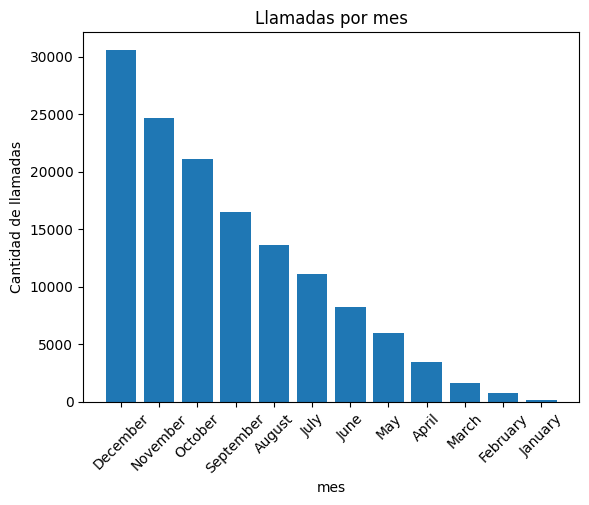

In [238]:
#agrupamos por mes
call_months = llamadas_hechas.groupby('month')['calls_counts'].sum().reset_index(name = 'call_months').sort_values(by = 'call_months', ascending = False)
call_months
#mostramos un histograma de las llamadas hechas por cada mes
plt.bar(call_months['month'], call_months['call_months'])
plt.xticks(rotation = 45)
plt.ylabel('Cantidad de llamadas')
plt.xlabel('mes')
plt.title('Llamadas por mes')
plt.show()

In [239]:
# Calcula la cantidad de minutos usados por cada usuario al mes.

#asigno una variable para calcular los minuto usados por user por mes
minutos_usados_por_mes = mega_calls.groupby(['user_id', 'month'])['duration'].sum().reset_index(name = 'used_minutes')

#imprimo resultado
minutos_usados_por_mes.head()

,user_id,month,used_minutes
0,1000,December,124
1,1001,August,182
2,1001,December,412
3,1001,November,426
4,1001,October,393


In [240]:
# Calcula el número de mensajes enviados por cada usuario al mes. 
mega_messages['month'] =mega_messages['message_date'].dt.strftime('%B')

#agrupamos por id y mes y contamos los mensajesenviamos
mensajes_enviados = mega_messages.groupby(['user_id', 'month'])['id'].count().reset_index(name = 'send_messages')
mensajes_enviados.head()

,user_id,month,send_messages
0,1000,December,11
1,1001,August,30
2,1001,December,44
3,1001,November,36
4,1001,October,53


In [241]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
mega_internet['month'] = mega_internet['session_date'].dt.strftime('%B')
#agrupamos por id y mes y contamos los mensajesenviamos
trafico_internet = mega_internet.groupby(['user_id', 'month'])['gb_used'].sum().reset_index(name = 'internet_trafic')

trafico_internet.head()

,user_id,month,internet_trafic
0,1000,December,4
1,1001,August,21
2,1001,December,55
3,1001,November,49
4,1001,October,50


In [242]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
total_mes_por_usuario = pd.merge(llamadas_hechas, minutos_usados_por_mes, on = ['user_id', 'month']).merge(mensajes_enviados, on = ['user_id', 'month']).merge(trafico_internet, on = ['user_id', 'month'])
total_mes_por_usuario.head()

,user_id,month,calls_counts,used_minutes,send_messages,internet_trafic
0,1000,December,16,124,11,4
1,1001,August,27,182,30,21
2,1001,December,56,412,44,55
3,1001,November,64,426,36,49
4,1001,October,65,393,53,50


In [243]:
# Añade la información de la tarifa

#se crea la variable 'plan_users' que se la union de los dataframe mega_users y mega_plans con la columna en comun 'plan_name'
plan_users = mega_users.merge(mega_plans, on = 'plan_name', how = 'outer')

#se realiza otro merge de plan users y el dataframe total_mes_por_usuario por user_id
total_users = plan_users.merge(total_mes_por_usuario, on = 'user_id', how = 'outer')

total_users.head()

,user_id,first_name,last_name,age,city,reg_date,plan_name,churn_date,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,month,calls_counts,used_minutes,send_messages,internet_trafic
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ULTIMATE,NaT,1000,30.0,3000,70,7,0.01,0.01,December,16.0,124.0,11.0,4.0
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,SURF,NaT,50,15.0,500,20,10,0.03,0.03,August,27.0,182.0,30.0,21.0
2,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,SURF,NaT,50,15.0,500,20,10,0.03,0.03,December,56.0,412.0,44.0,55.0
3,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,SURF,NaT,50,15.0,500,20,10,0.03,0.03,November,64.0,426.0,36.0,49.0
4,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,SURF,NaT,50,15.0,500,20,10,0.03,0.03,October,65.0,393.0,53.0,50.0


In [244]:
# Calcula el ingreso mensual para cada usuario

#agrupamos por usuario, mes plan y ciudad y sumamos la cantidad de llamadas, los minutos usados, los mensajes enviados y el internet consumido
df_total_users = total_users.groupby(['user_id', 'month', 'plan_name', 'city'])[['calls_counts', 'used_minutes', 'send_messages', 'internet_trafic']].sum()

#en otra variable se usa el agrupamiento para crear un dataframe independiente
df_income = df_total_users.reset_index()

income_monthly = df_income.merge(mega_plans, on = 'plan_name', how = 'outer')

#se crean columnas hallando el exceso hay por cada llamada, mensaje e internet consumido durante el mes y se lleva a 0 los valores negativo
income_monthly['excess_calls'] = (income_monthly['used_minutes'] - income_monthly['minutes_included']).clip(lower=0)
income_monthly['excess_message'] = (income_monthly['send_messages'] - income_monthly['messages_included']).clip(lower=0)
income_monthly['excess_internet'] = (income_monthly['internet_trafic'] - income_monthly['gb_per_month_included']).clip(lower=0)

#se halla el ingreso mensual de los usuarios
income_monthly['monthly_revenue'] = income_monthly['usd_per_minute'] * income_monthly['excess_calls'].clip(lower=0) + income_monthly['usd_per_message'] * income_monthly['excess_message'].clip(lower=0) + income_monthly['usd_per_gb'] * income_monthly['excess_internet'].clip(lower=0)+ income_monthly['usd_monthly_pay']


income_monthly[['user_id', 'monthly_revenue']].head()


,user_id,monthly_revenue
0,1001,80.00
1,1001,420.00
2,1001,360.00
3,1001,370.09
4,1001,280.00


## PASO 2: Analisis de lo datos

Describe el comportamiento de la clientela:

1. Encuentra los minutos, SMS y volumen de datos que requieren los usuarios de cada tarifa por mes.
2. Calcula la media, la varianza y la desviación estándar.
3. Traza histogramas. Describe las distribuciones.

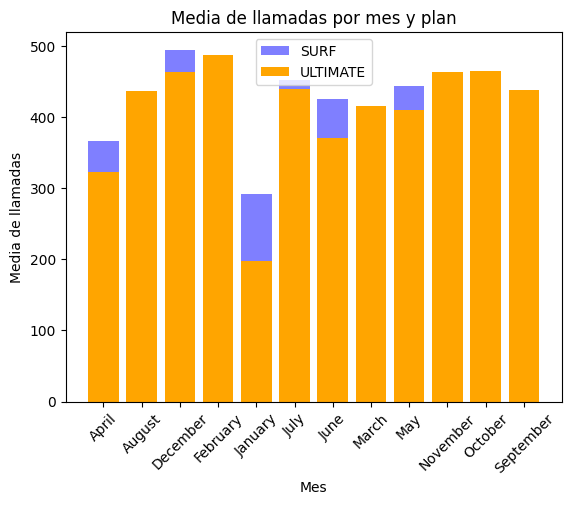

In [245]:
# Compararemos la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.

#creamos un nuevo dataframe mostrando el promedio de los minutos usados por plan y mes
mean_calls = income_monthly.groupby(['plan_name','month'])['used_minutes'].mean().reset_index(name = 'mean_calls')

#filtramos la data por el nombre del plan SURF y ULTIMATE y lo guardamos en una variable para cada una
surf_data = mean_calls.loc[mean_calls['plan_name'] == 'SURF']
ultimate_data = mean_calls.loc[mean_calls['plan_name'] == 'ULTIMATE']

#mostramos un grafico de barra superpuestos para cada plan
plt.bar(surf_data['month'], surf_data['mean_calls'], label='SURF', color='blue', alpha = 0.5)
plt.bar(ultimate_data['month'], ultimate_data['mean_calls'], label='ULTIMATE', color='orange')


plt.xlabel('Mes')
plt.ylabel('Media de llamadas')
plt.title('Media de llamadas por mes y plan')
plt.legend()
plt.xticks(rotation=45)
plt.show()                


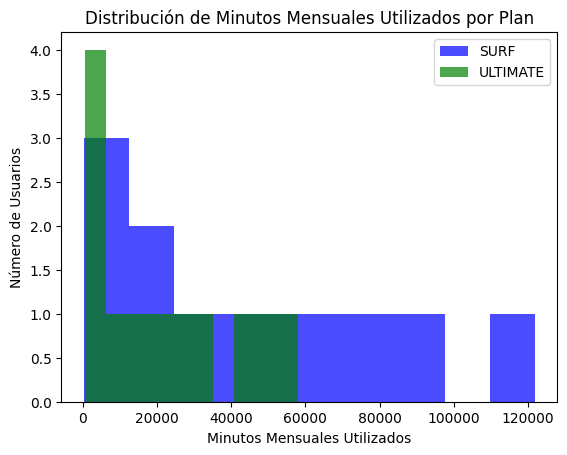

In [247]:
# Compararemos el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

#agrupamos por plan y por mes la suma de los minutos usados y lo guardamos en la variable total_minutes
total_minutes = income_monthly.groupby(['plan_name','month'])['used_minutes'].sum().reset_index(name = 'total_minutes')

#filtramos la la data por nombre del plan SURF y mostramos un histograma
surf_data_minutes = total_minutes.loc[total_minutes['plan_name'] == 'SURF']['total_minutes']
plt.hist(surf_data_minutes, bins=10, color='blue', alpha=0.7, label='SURF')

#filtramos la la data por nombre del plan ULTIMATE y mostramos un histograma
ultimate_data_minutes = total_minutes.loc[total_minutes['plan_name'] == 'ULTIMATE']['total_minutes']
plt.hist(ultimate_data_minutes, bins=10, color='green', alpha=0.7, label='ULTIMATE')


plt.xlabel('Minutos Mensuales Utilizados')
plt.ylabel('Número de Usuarios')
plt.title('Distribución de Minutos Mensuales Utilizados por Plan')
plt.legend()
plt.show()                

In [252]:
# Calcula la media y la varianza de la duración mensual de llamadas.

duration_calls = income_monthly['used_minutes'].mean()
varianza_calls = income_monthly['used_minutes'].var()

print(f'El promedio de duracion de las llamadas es:', duration_calls)
print()
print(f'La varianza de la duracion mensual de llamadas es: ', varianza_calls, '\nlo que indica que los datos de duración de llamadas\nestán muy dispersos alrededor de la media.\nEsto significa que hay una gran variabilidad en cuánto duran las llamadas mensuales.')

El promedio de duracion de las llamadas es: 444.7015349630472

La varianza de la duracion mensual de llamadas es:  57582.92053802935 
lo que indica que los datos de duración de llamadas
están muy dispersos alrededor de la media.
Esto significa que hay una gran variabilidad en cuánto duran las llamadas mensuales.


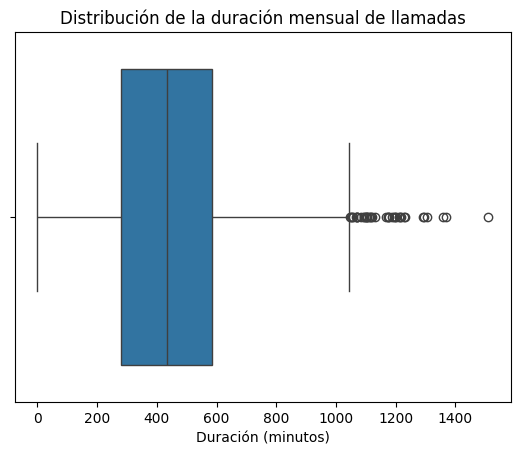

In [254]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas

#plt.figure(figsize=(10, 6))
sns.boxplot(x='used_minutes', data=income_monthly)
plt.title('Distribución de la duración mensual de llamadas')
plt.xlabel('Duración (minutos)')
plt.show()

Tal y como indica la varianza calculada hay una gran cantidad de datos dispersados alrededor de la media lo que asegura que si hay una gran variabilidad de la duracion de las llamadas.

In [270]:
#agrupamos por plan y contamos la cantidad de usuarios unicos que tiene cada uno

total_users = total_users.groupby('plan_name')['user_id'].nunique().reset_index(name = 'total_users')
total_users

,plan_name,total_users
0,SURF,339
1,ULTIMATE,161


SURF MESSAGES AMOUNT: 46598.0
ULTIMATE MESSAGES AMOUNT: 26898.0


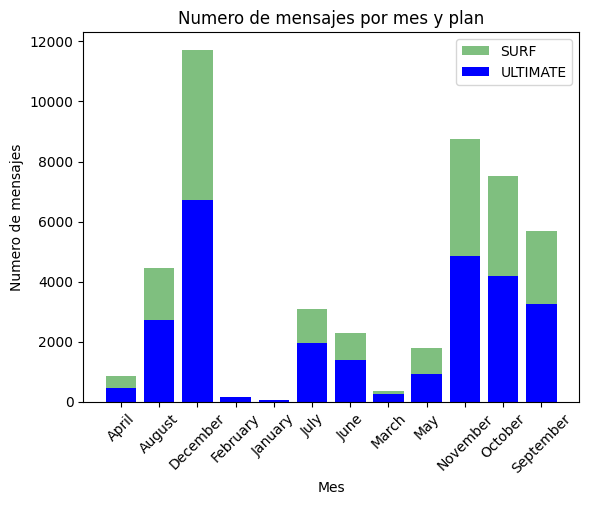

In [263]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan

total_messages = income_monthly.groupby(['plan_name','month'])['send_messages'].sum().reset_index(name = 'total_messages')

surf_data_messages = total_messages.loc[total_messages['plan_name'] == 'SURF']
print(f'SURF MESSAGES AMOUNT:', surf_data_messages['total_messages'].sum())
ultimate_data_messages = total_messages.loc[total_messages['plan_name'] == 'ULTIMATE']
print(f'ULTIMATE MESSAGES AMOUNT:', ultimate_data_messages['total_messages'].sum())


plt.bar(surf_data_messages['month'], surf_data_messages['total_messages'], label='SURF', color='green', alpha = 0.5)
plt.bar(ultimate_data_messages['month'], ultimate_data_messages['total_messages'], label='ULTIMATE', color='blue')


plt.xlabel('Mes')
plt.ylabel('Numero de mensajes')
plt.title('Numero de mensajes por mes y plan')
plt.legend()
plt.xticks(rotation=45)
plt.show()            




Según este grafico, el plan SURF tiene casi el doble de mensajes enviados a comparacion del plan ULTIMATE, esto es debido a que existen mas usurios registrados al plan SURF que al plan ULTIMATE, lo que hace que hayan mas mensajes usados por SURF que ULTIMATE. Además se evidencia que el mes donde mas se envian mensajes es en el mes de diciembre, y los meses donde menos se envia mensajes (para ambos planes) es en lo meses de enero y febrero.

SURF INTERNET AMOUNT: 47517.0
ULTIMATE INTERNET AMOUNT: 23817.0


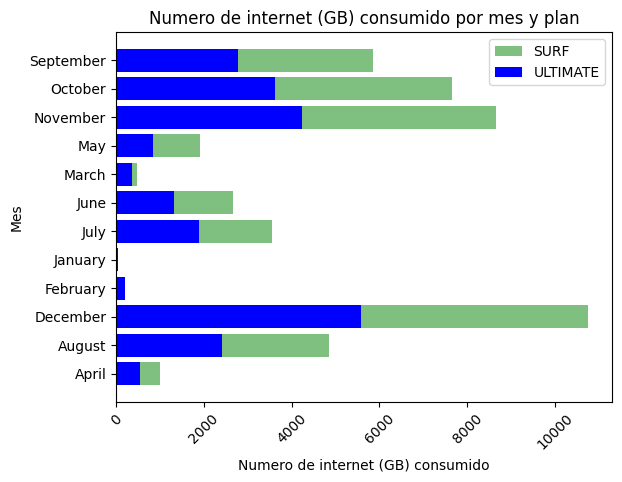

In [265]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan

total_internet = income_monthly.groupby(['plan_name','month'])['internet_trafic'].sum().reset_index(name = 'total_internet')


surf_data_internet = total_internet.loc[total_internet['plan_name'] == 'SURF']
print(f'SURF INTERNET AMOUNT:', surf_data_internet['total_internet'].sum())
ultimate_data_interent = total_internet.loc[total_internet['plan_name'] == 'ULTIMATE']
print(f'ULTIMATE INTERNET AMOUNT:', ultimate_data_interent['total_internet'].sum())

plt.barh(surf_data_internet['month'], surf_data_internet['total_internet'], label='SURF', color='green', alpha = 0.5)

plt.barh(ultimate_data_interent['month'], ultimate_data_interent['total_internet'], label='ULTIMATE', color='blue')



plt.ylabel('Mes')
plt.xlabel('Numero de internet (GB) consumido')
plt.title('Numero de internet (GB) consumido por mes y plan')
plt.legend()
plt.xticks(rotation=45)
plt.show()       

Según este grafico, el plan SURF tiene casi el doble de internet consumido a comparacion del plan ULTIMATE, esto es debido a que existen mas usurios registrados al plan SURF que al plan ULTIMATE, lo que hace que hayan mas internet consumido por SURF que ULTIMATE

In [271]:
#Describiriremos estadísticamente los ingresos de los planes.

ultimate_info = income_monthly[income_monthly['plan_name'] == 'ULTIMATE']
surf_info = income_monthly[income_monthly['plan_name'] == 'SURF']

In [280]:

surf_behave = surf_info['monthly_revenue'].describe()

print(f'PLAN SURF:\n{surf_behave}')
print()
ultimate_behave = ultimate_info['monthly_revenue'].describe()
print(f'PLAN ULTIMATE:\n{ultimate_behave}')

PLAN SURF:
count    1180.000000
mean      282.822619
std       159.681473
min        20.000000
25%       180.165000
50%       290.000000
75%       390.000000
max      1210.370000
Name: monthly_revenue, dtype: float64

PLAN ULTIMATE:
count    579.000000
mean     165.074266
std       84.618826
min       70.000000
25%       87.500000
50%      154.000000
75%      217.000000
max      532.000000
Name: monthly_revenue, dtype: float64


Para el plan SURF:

La media de los ingresos mensuales es $282.82. Esto sugiere que, en promedio, los usuarios generan ingresos moderados por mes. La mediana de los ingresos es de 290, lo que nos de a saber que al menos la mitad de los usuarios generan ingresos de 290 dolares o menos por mes. En cuanto a la desviacion estandar que es de 159.68 dolares, nos dice que existe una alta variabilidad en los ingresos mensuales, se infiere que hay una gran dispersion en los ingresos generados por los usuarios, algunos incurriendo en gastos significativos.

Para el plan ULTIMATE:

La media de los ingresos del plan ULTIMATE es de 165.07 aproximadamente . La mediana de los ingresos es 154, lo que indica que al menos la mitad de los usuarios gneran ingresos de 154 dolares por mes. Se ve tambien, que la desviacion estandar de 84.61 dolares, lo que señala una variablidad considerada en los ingresos mensuales. 
